# Symbulate Documentation: Commonly Used Probability Models

<a id='contents'></a>

1. [**Introduction and installing Symbulate**](index.html)
1. [**Probability spaces**](probspace.html)
1. [**Simulation tools**](sim.html)
1. [**Random variables**](rv.html)
1. [**Commonly used probability models**](#common)
  1. [**Cards, coins, dice**](#box)
  1. [**Discrete distributions**](#discrete)
  1. [**Continuous distributions**](#continuous)
  1. [**Joint distributions**](#joint)
  1. [**Random processes**](#process)
1. [**Multiple random variables and joint distributions**](joint.html)
1. [**Conditioning**](conditioning.html)
1. [**Random processes**](process.html)
1. [**Markov processes**](mc.html)

Instructions for downloading and installing Symbulate can be found [here](http://calpoly.edu/~dsun09/python.html). During a session, be sure to import Symbulate using the following commands.

In [1]:
from symbulate import *
%matplotlib inline

<a id='common'></a>
[Back to contents](#contents)

### Commonly used probability models

Many commonly used probability models are built into Symbulate.  These models can be used to either specify probability spaces or distributions of random variables.

<a id='box'></a>
[Back to contents](#contents)

### Cards, coins, dice

Many probabilistic situations involving physical objects like cards, coins, and dice can be specified with [BoxModel](probspace.html#boxmodel).

*Example*.  Rolling a fair n-sided die (with n=6).

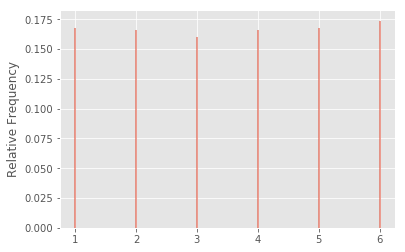

In [2]:
n = 6
die = list(range(1, n+1))
P = BoxModel(die)
RV(P).sim(10000).plot()

*Example.* Flipping a fair coin twice and recording the results in sequence.

In [3]:
P = BoxModel(['H', 'T'], size = 2, order_matters = True)
P.sim(10000).tabulate(normalize = True)

"('H', 'H')",0.2557
"('H', 'T')",0.2427
"('T', 'H')",0.2497
"('T', 'T')",0.2519
Total,1.0


*Example.* Unequally likely outcomes on a colored "spinner".

In [4]:
P = BoxModel(['orange', 'brown', 'yellow'], probs = [0.5, 0.25, 0.25])
P.sim(10000).tabulate(normalize = True)

brown,0.2548
orange,0.4911
yellow,0.2541
Total,1.0


`DeckOfCards()` is a special case of BoxModel for drawing from a standard deck of 52 cards.  By default `replace = False`.

In [5]:
DeckOfCards(size = 5).sim(3)

0,"((3, 'Clubs'), (2, 'Clubs'), ('Q', 'Hearts'), ('Q', 'Clubs'), (10, 'Spades'))"
1,"((9, 'Clubs'), (3, 'Diamonds'), ('Q', 'Hearts'), (2, 'Spades'), (4, 'Diamonds'))"
2,"((4, 'Diamonds'), (9, 'Diamonds'), (10, 'Hearts'), ('A', 'Clubs'), (8, 'Diamonds'))"


<a id='discrete'></a>
[Back to contents](#contents)

### Discrete distributions

Discrete distributions assign positive probability to the values in some countable set.  A discrete distribution can be specified by a *probability mass function*, $p(\cdot)$, which maps a value $x$ to its probability $p(x)\in [0,1]$.  The following discrete probability spaces are built in to Symbulate.
* Discrete uniform (see [BoxModel](probspace.html#boxmodel))
* [Bernoulli](#bernoulli)
* [Binomial](#binomial)
* [Hypergeometric](#hyper)
* [Poisson](#poisson)
* [Geometric](#geometric)
* [Negative binomial](#negative_binomial) (and the related [Pascal](#pascal))

<a id='bernoulli'></a>

A **Bernoulli($p$)** distribution takes value 1 with probability $p$ and 0 otherwise.

In [6]:
Bernoulli(p = 0.3).sim(10000).tabulate(normalize = True)

0,0.6965
1,0.3035
Total,1.0


<a id='binomial'></a>

**Binomial** distributions are often used to model the number of successes observed in a fixed number ($n$) of Bernoulli($p$) trials (independent, success/failure trials, with probability of success $p$ on each trial).  A Binomial distribution with parameters $n$ and $p$ is specified by
$$
p(x) = \binom{n}{x} p^x (1-p)^{n-x}, \quad x = 0, 1, 2, \ldots, n
$$

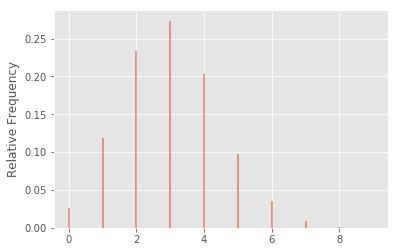

In [7]:
RV(Binomial(n = 10, p = .3)).sim(10000).plot()

<a id='hyper'></a>
[Back to contents](#contents)

**Hypergeometric** distributions are used to model the number of "successes" in $n$ draws without replacement from a box containing $N_0$ failures and $N_1$ successes. A hypergeometric distribution is specified by
$$
p(x) = \frac{\binom{N_1}{x}\binom{N_0}{n-x}}{\binom{N_0 + N_1}{n}}, \quad x = 0,1, \ldots, n;\; x \le N_1;\; n-x \le N_0
$$

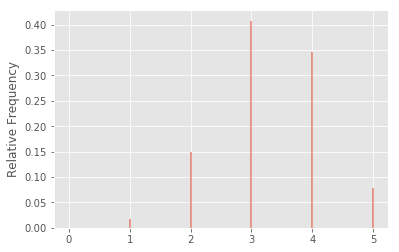

In [8]:
RV(Hypergeometric(n = 5, N0 = 5, N1 = 10)).sim(10000).plot()

<a id='poisson'></a>
[Back to contents](#contents)

A **Poisson** distribution with parameter $\lambda>0$ is specified by
$$
p(x) = \frac{e^{-\lambda} \lambda^x}{x!}, \quad x = 0, 1, 2, \ldots
$$
The mean and the variance of a Poisson($\lambda)$ distribution are both equal to $\lambda$.

(5.024, 5.0242239999999994)

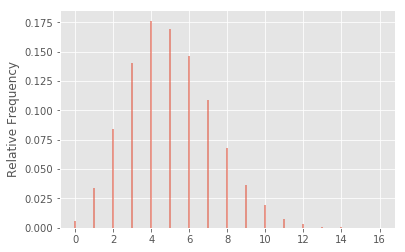

In [9]:
x = RV(Poisson(lam = 5)).sim(10000)
x.plot()
x.mean(), x.var()

<a id='geometric'></a>
[Back to contents](#contents)

**Geometric** distributions are often used to model the number of Bernoulli($p$) (independent, success/failure) trials needed to achieve the first success.  A geometric distribution with parameter $p$ is specified by
$$
p(x) = p(1-p)^{x-1}, \quad x = 1, 2, 3,\ldots 
$$

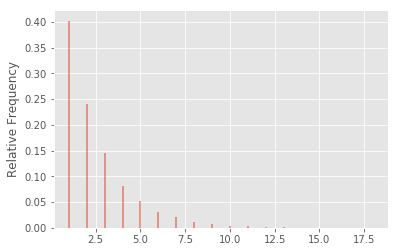

In [10]:
RV(Geometric(p = 0.4)).sim(10000).plot()

<a id='negative_binomial'></a>
[Back to contents](#contents)

**Negative binomial** distributions are often used to model the number of Bernoulli($p$) (independent, success/failure) trials needed to achieve a specified number of successes ($r$).  A negative binomial distribution with parameters $p$ and $r$ is specified by
$$
p(x) = \binom{x-1}{r-1}p^r(1-p)^{x-r}, \quad x = r, r+1, r+2,\ldots 
$$

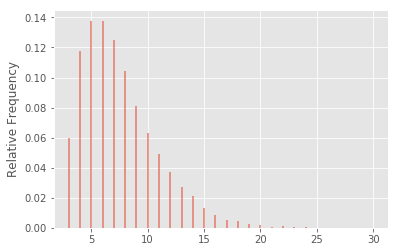

In [11]:
RV(NegativeBinomial(r = 3, p = 0.4)).sim(10000).plot()

<a id='pascal'></a>
[Back to contents](#contents)

A **Pascal** distribution has the same shape as a negative binomial distribution, but the distribution is supported on $\{0, 1, 2, \ldots\}$ rather than $\{r, r+1, r+2, \ldots\}$.
$$
p(x) = \binom{x+r-1}{r-1}p^r(1-p)^{x}, \quad x = 0, 1, 2,\ldots 
$$
If Bernoulli($p$) trials are performed until $r$ successes are achieved, then the number of *failures* observed will have a Pascal distribution.

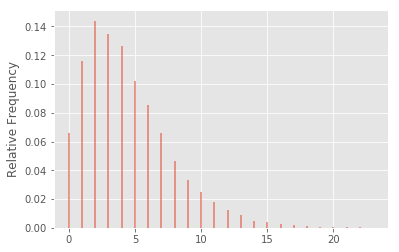

In [12]:
RV(Pascal(r = 3, p = 0.4)).sim(10000).plot()

If $X$ has a NegativeBinomial($r, p$) distribution then $Y= X - r$ has a Pascal($r, p$) distribution.

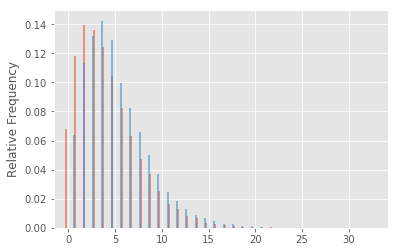

In [13]:
X = RV(NegativeBinomial(r = 3, p = 0.4))
(X-3).sim(10000).plot(jitter = True)
RV(Pascal(r = 3, p = 0.4)).sim(10000).plot(jitter = True)

<a id='continuous'></a>
[Back to contents](#contents)

### Common continuous distributions

A continuous probability distribution is specified by a *probability density function* $f$ which can be integrated to find probabilities of events.
$$
P(A) = \int_A f(x)\, dx
$$
The density $f(x)$ at a point $x$ is *not* a probability.  A continuous distribution assigns a probability of zero to all values, but
$$
P([x - h/2, x + h/2]) \approx f(x)h 
$$

The following continuous probability spaces are built in to Symbulate

* [Uniform](#uniform)
* [Normal (a.k.a. Gaussian)](#normal)
* [Exponential](#exponential)
* [Gamma](#gamma)
* [Chi Square](#chisquare)
* [T](#t)
* [F](#f)
* [Beta](#beta)

<a id='uniform'></a>

**Uniform** distributions are used to model situations is which every value in an interval is "equally likely".  The density of a Uniform distribution with parameters $a$ and $b$ is constant on the interval $(a, b)$.
$$
f(x) = \frac{1}{b-a}, \quad a < x < b
$$

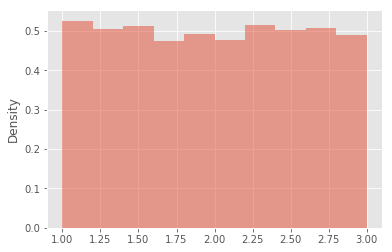

In [14]:
RV(Uniform(a = 1, b = 3)).sim(10000).plot()

<a id='normal'></a>
[Back to contents](#contents)

A **Normal** (a.k.a. **Gaussian**) distribution with mean $\mu$ and standard deviation $\sigma>0$ (and variance $\sigma^2$) has density
$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left({-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}\right), \quad -\infty < x< \infty
$$

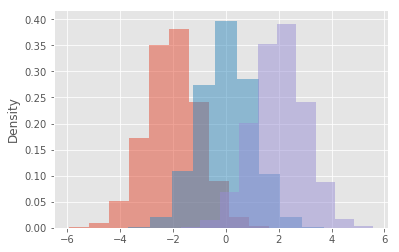

In [15]:
for mu in [-2, 0, 2]:
    RV(Normal(mean = mu, var = 1)).sim(10000).plot()

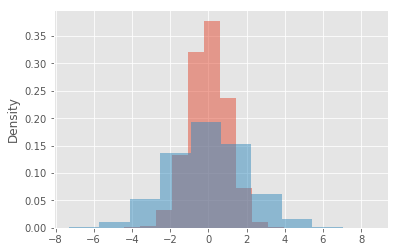

In [16]:
for sigma in [1, 2]:
    RV(Normal(mean = 0, sd = sigma)).sim(10000).plot()

<a id='exponential'></a>
[Back to contents](#contents)

An **Exponential** distribution with parameter $\lambda>0$ is specified by density
$$
f(x) = \lambda e^{-\lambda x}, \quad x>0
$$
Exponential distributions can be parametrized in terms of the rate parameter $\lambda$ (using `rate=`) or the scale parameter $1/\lambda$ (using `scale=`).

0.50199290457755419

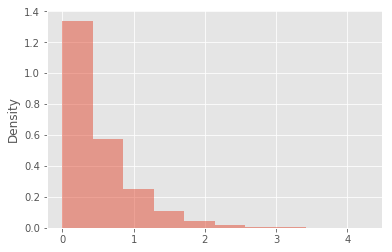

In [17]:
x = RV(Exponential(rate = 2)).sim(10000)
x.plot()
x.mean()

1.9718256022689238

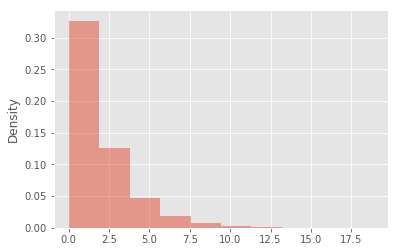

In [18]:
x = RV(Exponential(scale = 2)).sim(10000)
x.plot()
x.mean()

<a id='gamma'></a>
[Back to contents](#contents)

A **Gamma** distribution with shape parameter $\alpha>0$ and rate parameter $\lambda >0$ has density
$$
f(x) = \frac{\lambda^\alpha}{\Gamma(\alpha)} e^{-\lambda x} x^{\alpha -1}, \quad x>0
$$
where 
$$
\Gamma(\alpha) = \int_0^\infty e^{-u}u^{\alpha - 1}\, du, \quad \text{with } \Gamma(k) = (k-1)! \text{ if $k$ is a positive integer}
$$
Gamma distributions can be parametrized in terms of the rate parameter $\lambda$ (using `rate=`) or the scale parameter $1/\lambda$ (using `scale=`).

2.0028166184545957

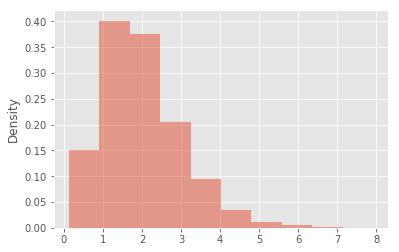

In [19]:
x = RV(Gamma(shape = 4, rate = 2)).sim(10000)
x.plot()
x.mean()

7.9988186515456272

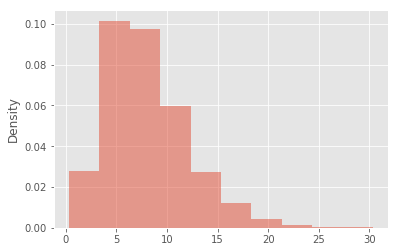

In [20]:
x = RV(Gamma(shape = 4, scale = 2)).sim(10000)
x.plot()
x.mean()

<a id='chisquare'></a>
[Back to contents](#contents)

A Gamma distribution with shape parameter $\frac{m}{2}$ and rate parameter $\frac{1}{2}$ is also known as a **Chi-square** distribution with m degrees of freedom and has density

$$
f(x) = \frac{\frac{1}{2}^{m/2}}{\Gamma\left(\frac{m}{2}\right)} e^{-\left(1/2\right)x} \, x^{ \left(m/2 - 1\right)}, \quad x>0
$$

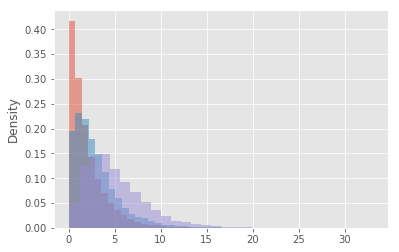

In [21]:
for m in [2, 3, 5]:
    RV(ChiSquare(df = m)).sim(10000).plot(bins = 30)

<a id='t'></a>
[Back to contents](#contents)

A **(Student's) t** distribution with *m* degrees of freedom has density

$$
f(x) = \frac{\Gamma \left(\frac{m+1}{2}\right)}{\sqrt{m\pi}\,\Gamma\left(\frac{m}{2}\right)} \left(1+x^{2}/m\right)^{-\left(m+1\right)/2}
$$

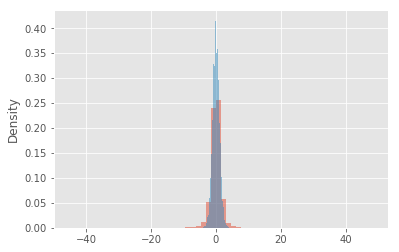

In [22]:
for m in [3, 20]:
    RV(StudentT(df = m)).sim(10000).plot(bins = 60)

A (Student's) t distribution is more conveniently defined via the following: 

If Z has a Normal(0,1) distribution, Y has a chi-square distribution with m degrees of freedom, and are Y and Z independent, then the random variable

$$\frac{Z}{ \sqrt{Y/m} }$$

has a (Student's) t distribution with *m* degrees of freedom.

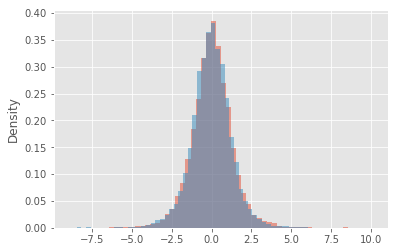

In [23]:
m = 5
Z, Y = RV(Normal(mean = 0, sd = 1) * ChiSquare(df = m))
(Z / (sqrt(Y / m))).sim(10000).plot(bins = 60)
RV(StudentT(df = m)).sim(10000).plot(bins = 60)

<a id='f'></a>
[Back to contents](#contents)

An **F** distribution with *m* degrees of freedom in the numerator and *n*  degrees of freedom in the denominator has density


$$
f(x) = \frac{\Gamma\left(\left(m + n\right)/2\right)m^{m/2}n^{n/2}}{\Gamma\left(m/2\right)\Gamma\left(n/2\right)} \frac{x^{m/2 - 1}}{\left(mx + n\right)^{\left(m + n\right)/2}}, \quad x > 0
$$

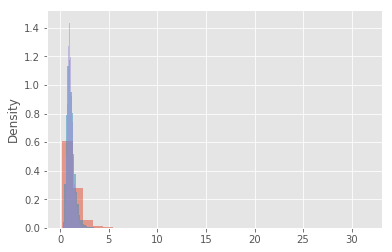

In [24]:
m = 50
for n in [10, 25, 50]:
    RV(F(dfN = m, dfD = n)).sim(10000).plot(bins = 30)

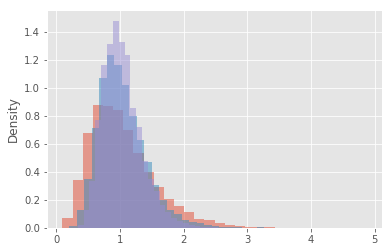

In [25]:
n = 50
for m in [10, 25, 50]:
    RV(F(dfN = m, dfD = n)).sim(10000).plot(bins = 30)

An F distribution is more conviently defined via the following:

If $Y_1$ has a chi-square distribution with m degrees of freedom, $Y_2$ has a chi-square distribution with n degress of freedom, and $Y_1$ and $Y_2$ are independent, then the random variable 

$$\frac{Y_1/m}{Y_2/n}$$

has an F distribution with m degrees of freedom in the numerator and n degrees of freedom in the denominator.

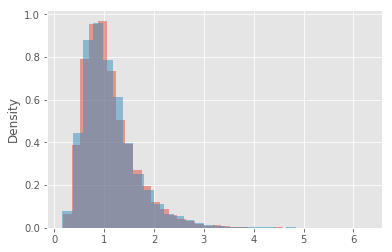

In [26]:
m = 20
n = 20
Y1, Y2 = RV(ChiSquare(df = m) * ChiSquare(df = n))
((Y1 / m) / (Y2 / n)).sim(10000).plot(bins = 30)
RV(F(dfN = m, dfD = n)).sim(10000).plot(bins = 30)

<a id='joint'></a>
[Back to contents](#contents)
<a id='beta'></a>

**Beta** distributions are probability distributions on bounded intervals.  For a Uniform(0, 1) distribution, the probability density is constant on the interval (0, 1).  Beta distributions on probability distributions on the interval (0, 1) where the density is not necessarily constant.  A Beta distribution with parameters $\alpha>0$ and $\beta>0$ has density
$$
f(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}  x^{\alpha-1} (1-x)^{\beta-1}, \qquad 0 < x < 1,
$$
where 
$$
\Gamma(\alpha) = \int_0^\infty e^{-u}u^{\alpha - 1}\, du, \quad \text{with } \Gamma(k) = (k-1)! \text{ if $k$ is a positive integer}
$$
Note that the Beta distribution with $\alpha = \beta=1$ is the Uniform(0,  1) distribution.

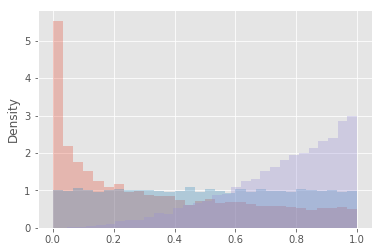

In [27]:
for a in [0.5, 1, 3]:
    RV(Beta(a, b = 1)).sim(10000).plot(bins = 30, alpha = 0.3)

Beta distributions can be generalized to intervals $(c, d)$ by rescaling.  If $X$ has a Beta distribution then $c + (d-c) X$ will have a distribution with the same shape on the interval $(c, d)$.

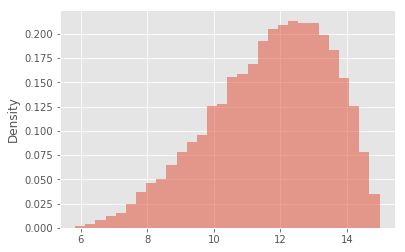

In [28]:
X = RV(Beta(4, 2))
c = 5
d = 15
(c + (d - c) * X).sim(10000).plot(bins = 30)

[Back to contents](#contents)

### Joint distributions

A *bivariate distribution* is a probability distribution on $(x, y)$ pairs in $\mathbb{R}^2$. A discrete bivariate distribution can be specified by a joint probability mass function $p(\cdot, \cdot)$ which maps an $(x, y)$ pair to its probability $p(x, y)\in [0,1]$.  A continuous bivariate distribution can be specified by a joint probability density function $f(\cdot, \cdot)$ which can be integrated to obtain probabilities
$$
P(A) = {\iint}_A\, f(x,y)\, dx\, dy, \qquad A \subset \mathbb{R}^2
$$

More generally, *joint (or multivariate) distributions* are probability distributions on tuples in $\mathbb{R}^n$, and can be specified by a joint probability mass function (if jointly discrete) or joint probability density function (if jointly continuous).

The following joint probability spaces are built in to Symbulate.

* [BivariateNormal](#bvn)
* [MultivariateNormal](#mvn)

<a id='bvn'></a>

A **Bivariate Normal** (a.k.a. **Bivariate Gaussian**) is specified by two marginal means $\mu_1, \mu_2$, two marginal standard deviations $\sigma_1, \sigma_2$ (or variances), and the correlation coefficient $\rho$ (or covariance).  A Bivariate normal distribution has joint density
$$
f(x, y) = \frac{1}{2\pi\sigma_1\sigma_2 \sqrt{1-\rho^2}} \exp\left(-\frac{1}{2(1-\rho^2)}\left[\left(\frac{x-\mu_1}{\sigma_1}\right)^2 + \left(\frac{y-\mu_2}{\sigma_2}\right)^2 - 2\rho \left(\frac{x-\mu_1}{\sigma_1}\right)\left(\frac{y-\mu_2}{\sigma_2}\right)\right]\right), \quad -\infty < x< \infty, \, -\infty < y < \infty
$$

In [29]:
RV(BivariateNormal(mean1 = 0, mean2 = 1, sd1 = 1, sd2 = 2, corr = 0.5)).sim(5)

0,"(-2.3338387141585994, -1.9539934366328358)"
1,"(-0.63296397776084001, 3.4117345724886836)"
2,"(0.81454240306935211, 0.76341528811858073)"
3,"(-1.2173091023389482, -1.0101471214378179)"
4,"(-1.2849150122385919, 0.23026207899563123)"


((-0.017234222709370511, 1.0615573336588757),
 (1.0002374833350105, 1.9627909282993734),
 0.4831438402200961)

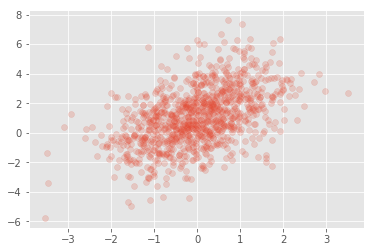

In [30]:
x = RV(BivariateNormal(mean1 = 0, mean2 = 1, sd1 = 1, sd2 = 2, corr = 0.5)).sim(1000)
x.plot(alpha = 0.2)
x.mean(), x.sd(), x.corr()

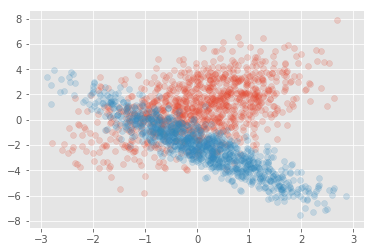

In [31]:
RV(BivariateNormal(mean1 = 0, mean2 = 1, sd1 = 1, sd2 = 2, corr = 0.5)).sim(1000).plot(alpha = 0.2)
RV(BivariateNormal(mean1 = 0, mean2 = -2, var1 = 1, var2 = 4, cov = -1.8)).sim(1000).plot(alpha = 0.2)

The marginal distributions of a bivariate normal distribution are (univariate) normal distributions.

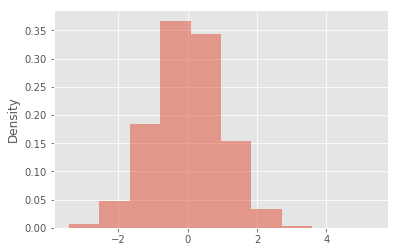

In [32]:
X, Y = RV(BivariateNormal(mean1 = 0, mean2 = 1, sd1 = 1, sd2 = 2, corr = 0.5))
X.sim(10000).plot()

<a id='mvn'></a>

**Multivariate Normal distributions.** A bivariate normal distribution is a special case of a Multivariate Normal distribution (a.k.a. joint Gaussian distribution).  A multivariate normal distribution is specified by
* a mean vector, which specifies the marginal means
* a covariance matrix, which specifies the covariance between each coordinate pair.  (The diagonal entries of the covariance matrix specify the marginal variances

In [33]:
mu = [1, 2, 3]
Sigma = [[1, 1, -2],
        [1, 4, 0],
        [-2, 0, 9]]
X = RV(MultivariateNormal(mean = mu, cov = Sigma))
X.sim(5)

0,"(0.93795746959790716, 6.1855131016432656, 6.9828082834834184)"
1,"(2.6295380209522117, 3.6544584843144046, -0.51259308050528141)"
2,"(-0.8199044681915062, 1.285151170504621, 7.061419422527651)"
3,"(2.0604009794572837, 1.5002767059806652, -0.47937185654022541)"
4,"(0.28320991105706561, -0.6155392245085527, 1.7136219307244334)"


In [34]:
x = X.sim(10000)
x.mean(), x.cov()

((1.0018923254374064, 1.992400369788113, 2.9817320250859867),
 array([[ 0.99964809,  1.02747287, -1.9928467 ],
        [ 1.02747287,  4.1057754 , -0.04278879],
        [-1.9928467 , -0.04278879,  8.95438691]]))

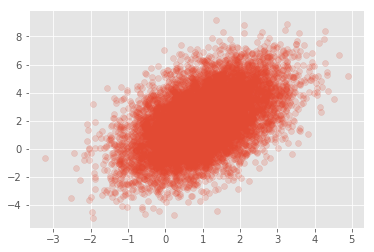

In [35]:
X, Y, Z = RV(MultivariateNormal(mean = mu, cov = Sigma))
(X & Y).sim(10000).plot(alpha = 0.2)

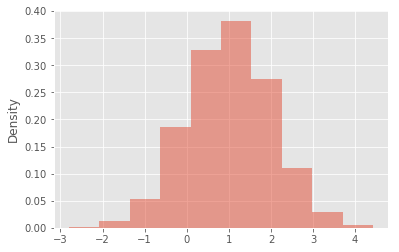

In [36]:
X.sim(10000).plot()

<a id='process'></a>
[Back to contents](#contents)

### Random processes

Several common random processes are built in to Symbulate including the following.  See the documentation for these processes for more details.

* [Discrete time Markov chains](mc.html#dtmc)
* [Continuous time Markov chains](mc.html#ctmc)
* [Poisson processes](mc.html#poisson)


[Back to contents](#contents)